In [384]:
"""
Some official-ish code for a class function for Root Systems so called 'Petri Projection'
"""

def coxeter_projection(self,alpha=0.2):
    L               = self.root_lattice()
    roots           = L.roots()
    simple_roots    = L.simple_roots()
    weyl_group      = L.weyl_group()
    coxeter_element = weyl_group.coxeter_element().matrix()
    coxeter_number  = weyl_group.coxeter_number()

    ev = coxeter_element.eigenvectors_left()
    cox_plane = max(ev,key=lambda x : x[0].real() - (x[0].imag() < 0))[1][0] #wacky hack, if I do say so myself
    root_coordinates = [vector(r.dense_coefficient_list()) for r in roots]

    M = R.cartan_matrix()
    D = M.dense_matrix()
    
    #I'm not sure how to change graphics size for Sage primitives
    #plt.figure(figsize=(12,12))

    radii = []
    #colours = ['b','g','r','c','m','y','k']
    to_scatter = []
    to_plot    = []

    for r_i in range(len(roots)):
        
        #Printing progress is probably poor manners
        #if coords_i %10 == 0:
        #    print(coords_i)
        
        coords     = root_coordinates[r_i]
        inner_prod = coords.inner_product(cox_plane)
        to_scatter.append([inner_prod.real(),inner_prod.imag()])
        
        if inner_prod.norm() not in radii:
            radii.append(inner_prod.norm())
    
    colours = [hue(float(x)/float(len(radii))) for x in range(len(radii))]
    #print(colours)

    for r_i in range(len(roots)):
        
        #Printing progress is probably poor manners
        #if coords_i % 10 == 0:
        #    print(coords_i)
        
        coords     = root_coordinates[r_i]
        inner_prod = coords.inner_product(cox_plane)

        f = lambda s : (s-coords)*D*(s-coords)
        close = [s.inner_product(cox_plane) for s in root_coordinates[:r_i] if f(s) == 2]
        
        [to_plot.append([[(inner_prod.real(),inner_prod.imag()),(s.real(),s.imag())],
                        colours[radii.index(max(inner_prod.norm(),s.norm()))%len(colours)]]) for s in close]

    return scatter_plot(to_scatter,figsize=(8,8))+sum([line(x[0],color=x[1],alpha=alpha) for x in to_plot])


RootSystem.coxeter_projection = coxeter_projection 

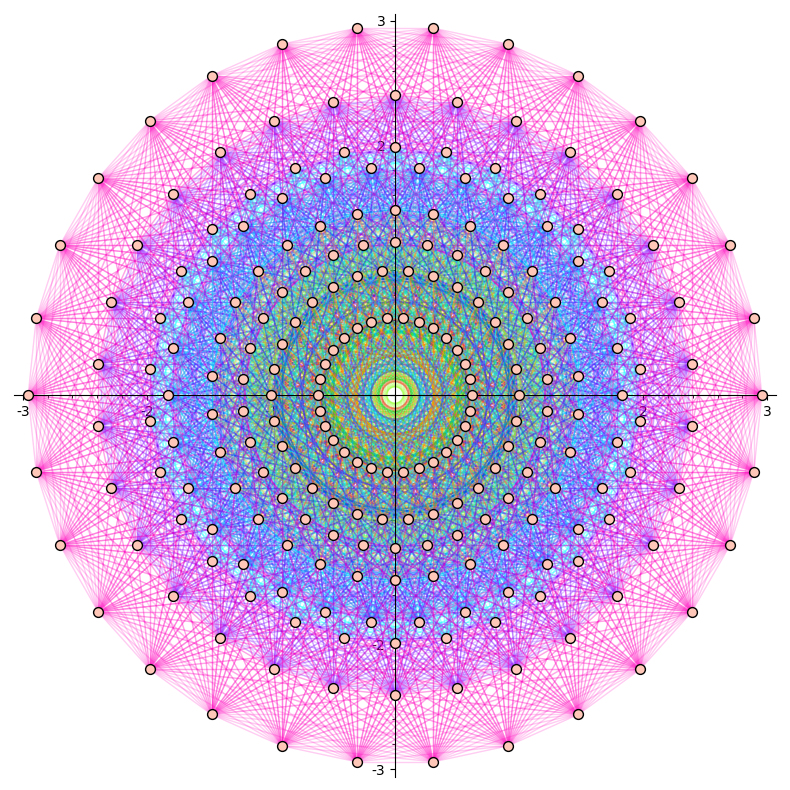

In [380]:
R = RootSystem(["E",8])
R.coxeter_projection()

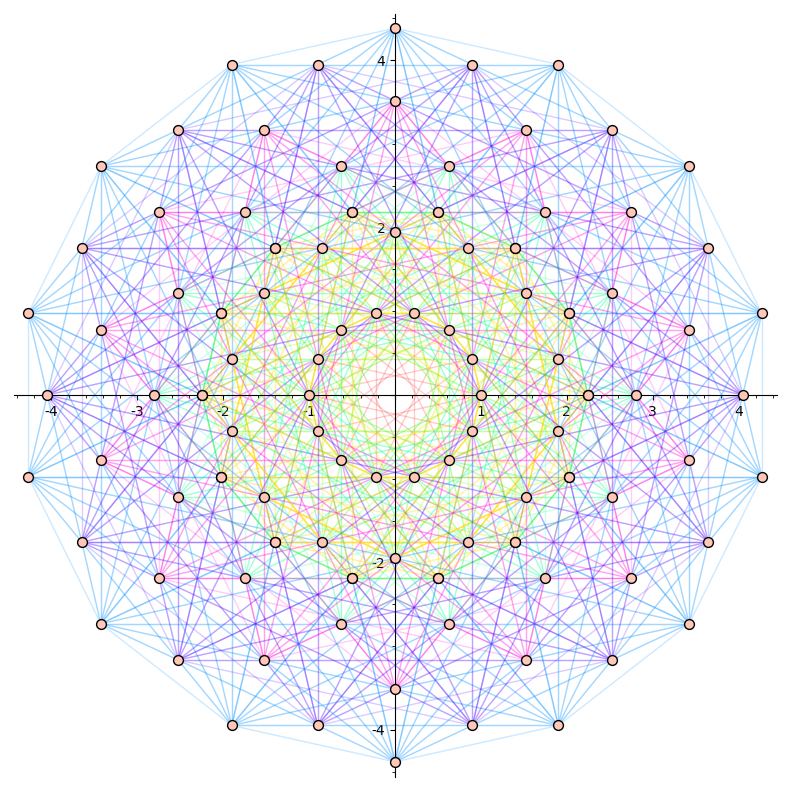

In [382]:
R = RootSystem(["D",8])
R.coxeter_projection()

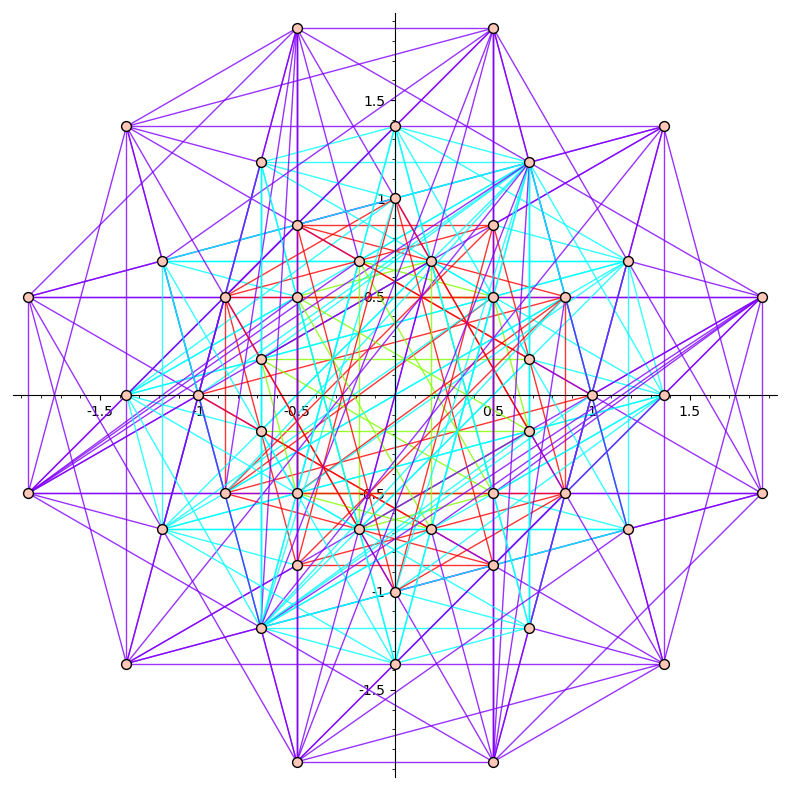

In [386]:
R = RootSystem(["F",4])
R.coxeter_projection(alpha=0.8)

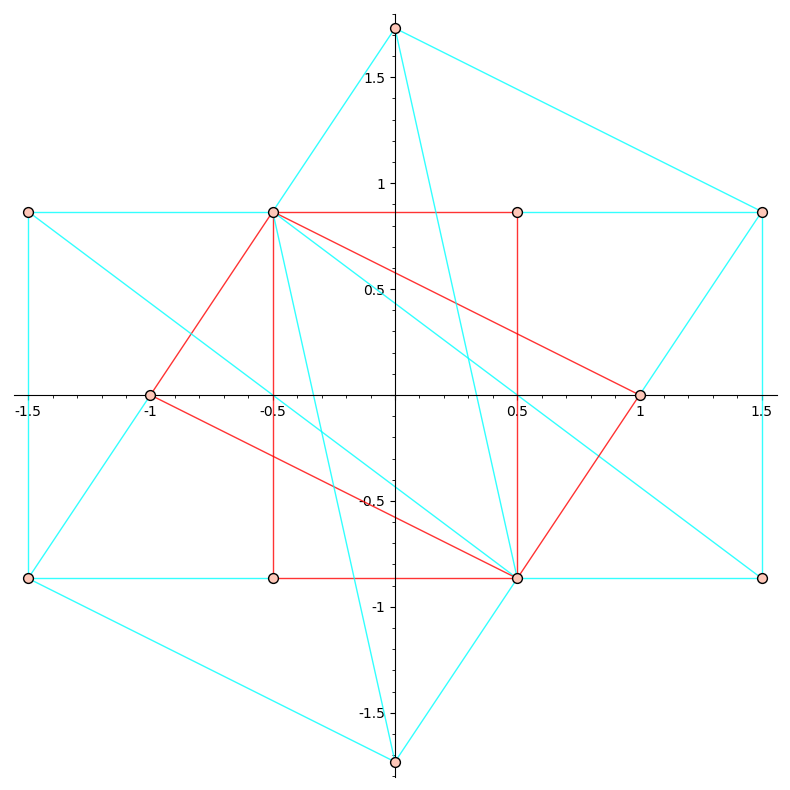

In [387]:
R = RootSystem(["G",2])
R.coxeter_projection(alpha=0.8)